##  캘리포니아 집값 예측하기
#### Y = WX + b

In [33]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('./datasets/housing.csv')
df.shape
#df = df.sample(1000) #데이터 1천개 제한
df = df.iloc[:5000]

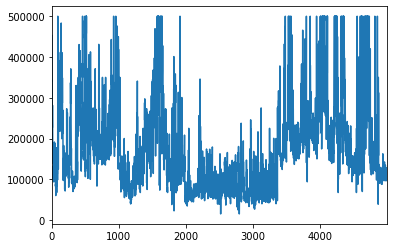

In [41]:
df['median_house_value'].plot()

In [42]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [43]:
#누락 확인, 평균값으로 채우자
df.isna().sum(), df['total_bedrooms'].mean()

(longitude              0
 latitude               0
 housing_median_age     0
 total_rooms            0
 total_bedrooms        53
 population             0
 households             0
 median_income          0
 median_house_value     0
 ocean_proximity        0
 dtype: int64, 508.4584596725288)

In [44]:
# 평균값으로 채워서 덮어쓴다
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())
df.isna().sum().sum()

0

In [45]:
#카테고리 컬럼은 원핫 인코딩 전처리를 한다
data = pd.get_dummies(df)

In [46]:
y = data['median_house_value']
x = data.drop(columns='median_house_value')
#위도 경도도 빼고
x = x.iloc[:, 2:]
x.shape, y.shape

((5000, 10), (5000,))

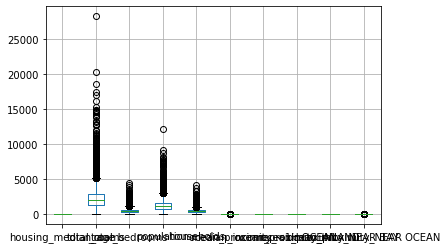

In [47]:
x.boxplot()

In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x, y)
model.coef_.shape, model.intercept_
model.score(x, y)

0.6928880467106441

In [57]:
x = np.array(x)
y = np.array(y)
xn = (x - np.min(x, 0))/(np.max(x, 0)-np.min(x, 0)) #min-max 정규화
yn = (y - np.min(y, 0))/(np.max(y, 0)-np.min(y, 0))
yn = np.reshape(yn, [-1,1])

In [58]:
col = x.shape[1]
col

10

In [60]:
w = tf.Variable(tf.random_normal(shape=[col])) 
b = tf.Variable(0.01) 
hypothesis = tf.reduce_sum(w * xn, axis=1, keepdims=True) + b #가설
print('hypothesis',hypothesis)
cost = tf.reduce_mean((yn - hypothesis)**2)  #  y(5,1), h(5,1)
learning_rate = 0.01 #학습률
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

hypothesis Tensor("add_9:0", shape=(5000, 1), dtype=float32)


In [61]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())#변수 초기화, c의 malloc 과 동일

In [69]:
for i in range(1000): #에포크(iteration) : 몇번 변수를 업데이트 하느냐
    sess.run(train)
    if i%100==0:
        print(i, sess.run(cost))

0 0.057683364
100 0.054578874
200 0.05212477
300 0.049978387
400 0.04802909
500 0.04623417
600 0.044571973
700 0.04302816
800 0.041591547
900 0.040252674


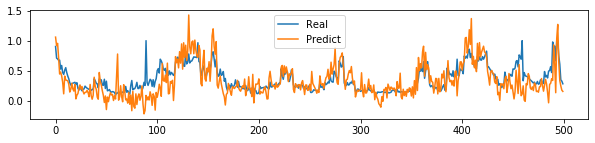

In [73]:
p = sess.run(hypothesis) #예측
plt.figure(figsize=(10,2))
plt.plot(yn[:500], label='Real')
plt.plot(p[:500], label='Predict')
plt.legend()